# __Protugese Bank Marketing__ 
### Predicting customer response based on telemarketing data

## ___Table of Contents:___

1. [__Problem Statement__](#Problem)
2. [__Data Cleaning__](#DataCleaning)
3. [__Exploratory Data Analysis__]()
4. [__Data Visualization__]()
5. [__Model Selection__]()
6. [__Model Evaluation__]()
7. [__Hyperparameter Tuning__]()
8. [__Conclusion & Further Research recommandations__]()

### __Part 1. Problem Statement__

- The dataset provided is the record of all campaign calls performed during marketing campaign of a portugese bank for their __term deposit__ service. The task is to predict the client's acceptance or declination to the purchase of the aforementioned service offered by the bank based on the features provided in the dataset

- The dataset is a record of the following features

| feature          | brief                                             | type        |
| ---------------- | ------------------------------------------------- | ----------- |
| age              | age                                               | numeric     |
| job              | type of job                                       | categorical |
| marital          | marital status                                    | categorical |
| education        | education level                                   | categorical |
| default          | has credit in default ?                           | categorical |
| housing          | has housing loan ?                                | categorical |
| loan             | has personal loan ?                               | categorical |
| contact          | contact communication type                        | categorical |
| month            | last contact month of the year                    | categorical |
| day\_of\_week    | day of the week on which contacted                | categorical |
| duration         | last call duration in seconds                     | numeric     |
| campaign         | number of contacts performed during this campaign | numeric     |
| pdays            | number of days since last contact                 | numeric     |
| previous         | number of contacts performed before this campaign | numeric     |
| poutcome         | outcome of previous marketing campaign            | numeric     |
| emp\_var\_rate   | employment variation rate                         | numeric     |
| cons\_price\_idx | consumer price index                              | numeric     |
| cons\_conf\_idx  | consumer confidence index                         | numeric     |
| euribor3m        | euribor 3 month rate                              | numeric     |
| nr\_employed     | number of employees                               | numeric     |

- Banking entities spend a huge amount on telemarketing campaigns to extend their services and make customers aware about new services and bring more customers for the same. The purpose of this project is to analyse the data and create a predictive model that can based on the features provided predict the customer's response to a purchase of the term deposit offered by the bank.
- Doing so considerably reduces the cost of telemarketing incurred by the bank as this analysis makes the entity aware of the customers and other features that lead to a successfull campaign ahead of time.

### __Part 1.2: Data Loading__

#### Import all required libraries and dependencies

In [1]:
# important data analytics and data manipulation lib
import os
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis

# Data Visualization lib
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh

# ML libraries for data prep and modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score

# ML algorithms to be used
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Model evaluation
from sklearn.metrics import accuracy_score, classification_report

# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

# warning
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# loading bokeh
from bokeh.plotting import output_notebook, show
output_notebook()

Loading BokehJS ...

#### Data is loaded using a .env file to maintain data privacy

In [2]:
# loading data using .env file

from dotenv import load_dotenv

dotenv_path = os.getcwd()+'\\local.env'
load_dotenv(dotenv_path=dotenv_path)

True

##### For our modelling purpose we shall use the bank additional data set as it has socio-economic features along with the marketing features that can provide for a better prediciton

### Load the data

In [3]:
columns = ['age','job','marital','education','default','housing','loan','contact','month',\
      'day_of_week','duration','campaign','pdays','previous','poutcome','emp_var_rate',\
      'cons_price_idx','cons_conf_idx','euribor3m','nr_employed','response']

df = pd.read_csv(os.getenv('bank_additional_data'), sep=';')
df.columns = columns
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,response
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.shape

(41188, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### __Part 2: Data Cleaning__

In [7]:
# lets list out all the values and their counts for categorical columns to understand the distribution and unknown tags

def list_value_counts(df, dtype='cat'):
    assert dtype in ['cat', 'num'], "dtype accepts either 'cat' for categorical or 'num' for numerical columns only"
    """
    lists the value counts of all features based on the datatype provided 
    *dtype = 'cat' by default for categorical columns can be changed to 'num' for numerical columns
    """
    list_value_counts.cat = ['object','bool']
    list_value_counts.num = ['int64','float64','int32','float32','int','float']
    sel_dtype = getattr(list_value_counts, dtype)
    
    for i in df:
        if df[i].dtype in sel_dtype:
            print(f"________{i}_________")
            print(df[i].value_counts())
            print()
            
list_value_counts(df, dtype='cat')

________job_________
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

________marital_________
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

________education_________
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

________default_________
no         32588
unknown     8597
yes            3
Name: default, dtype: int64

________housing_________
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

________loan_________
no         33950
yes         6

#### Unknown values
Dataset total : __41188__
 - job: __330__
 - marital: __80__
 - education: __1731__
 - default: __8597__
 - housing and loan: __880__
 
From the above it is evident that most of the unknown values are significantly less and can be dropped.
The default feature has the highest number of unknowns but it cannot be dropped at axis=0 or axis=1 since the feature has relavence for the domain and problem at hand and the unknown values are significantly high to drop those records

We shall drop all the unknown records except for default. We shall keep the unknown as a value for default

In [8]:
def drop_unknown_records(df, exception=None, dtype='cat', unknown='unknown'):
    assert unknown in ['unknown', 'other', np.nan], "unknown accepts only 'unknown', 'other' or np.nan as values"
    assert dtype in ['cat', 'num'], "dtype accepts either 'cat' for categorical or 'num' for numerical columns only"
    assert isinstance(exception, list), "exception has to be a list of features to be excluded from dropping unknowns or dropping features"
    """
    lists the value counts of all features based on the datatype provided 
    *dtype = 'cat' by default for categorical columns can be changed to 'num' for numerical columns
    """
    drop_unknown_records.cat = ['object','bool']
    drop_unknown_records.num = ['int64','float64','int32','float32','int','float']
    
    sel_dtype = getattr(drop_unknown_records, dtype)
    
    for i in df:
        if i not in exception:
            if df[i].dtype in sel_dtype:
                df.drop(df[df[i] == 'unknown'].index, axis=0, inplace=True)
                
drop_unknown_records(df, exception=['default',])
df.shape

(38245, 21)

Now we have gotten rid of all of our unknown records at axis=0 i.e. index level other than for the feature named "default".
Now the problem lies with what features to keep and what to drop if any are irrelevant to the dataset
If we look closely we can comprehend given the problem at hand we need not drop any features yet but we can create one or two synthetic features to add value to the data 

#### __Synthetic features__
1. ___no_of_loans___ - 2 if housing and loan 1 if either of them and 0 if both are a no
2. ___duration_bins___ - binned duration column

In [9]:
mapping = {'yes':1, 'no':0}
df['no_of_loans'] = df.housing.map(mapping) + df.loan.map(mapping)

df['duration_binned'] = pd.cut(df.duration/60, [0,5,10, 20, 30, 40, 50, 60, 70, 80, 90], \
                               labels=["<10",">10","11-20","21-30","31-40","41-50","51-60","61-70","70-80","80+"])

df.duration_binned.value_counts()

<10      27842
>10       7189
11-20     2737
21-30      377
31-40       66
41-50       15
51-60       10
61-70        4
80+          1
70-80        0
Name: duration_binned, dtype: int64

### __Part 3: Exploratory Data Analysis__

### lets visualize the data distribution

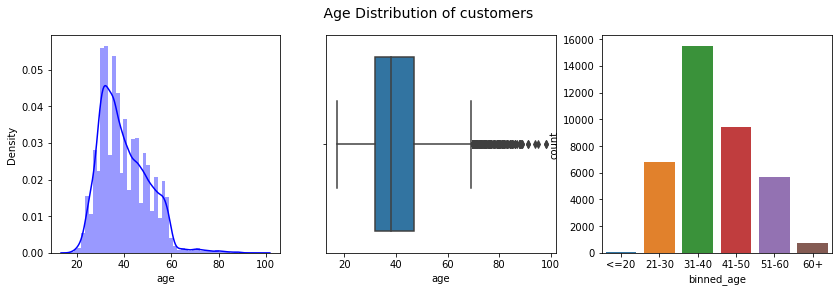

In [10]:
# bin the ages for proper count
df['binned_age'] = pd.cut(df.age, bins=[0, 20,30, 40, 50, 60, 100], labels=[ "<=20", "21-30", "31-40", "41-50", "51-60", "60+"])

# plot three figures to completely describe the distribution of Age
fig, axes = plt.subplots(1,3, figsize=(14,4), 
                       sharex=False, sharey=False, squeeze=False)

fig.suptitle(' Age Distribution of customers ', fontsize=14)
sns.distplot(df.age, ax=axes[0,0], color="blue")
sns.countplot(df.binned_age)
sns.boxplot(df.age, ax=axes[0,1])
plt.show()

In [11]:
df.binned_age.value_counts()/df.shape[0]*100

31-40    40.536018
41-50    24.575762
21-30    17.759184
51-60    14.856844
60+       2.034253
<=20      0.237940
Name: binned_age, dtype: float64

##### As visible from above numerics more than __57%__ of the population falls in the age group of 31 to 40 

## __Categorical data distribution__

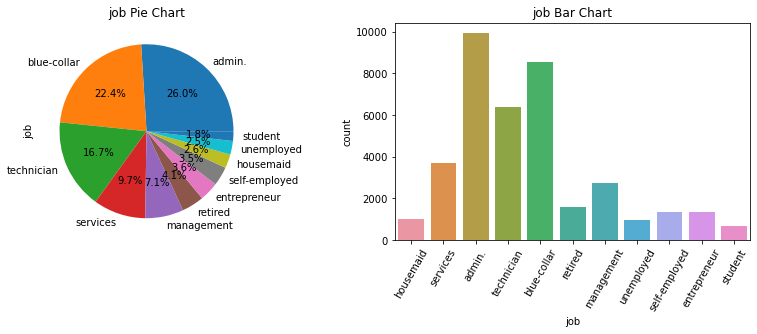

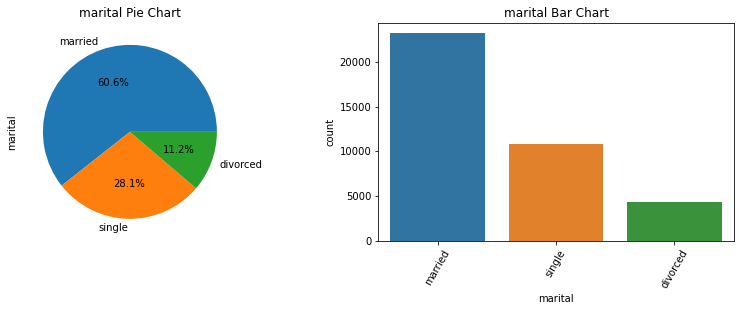

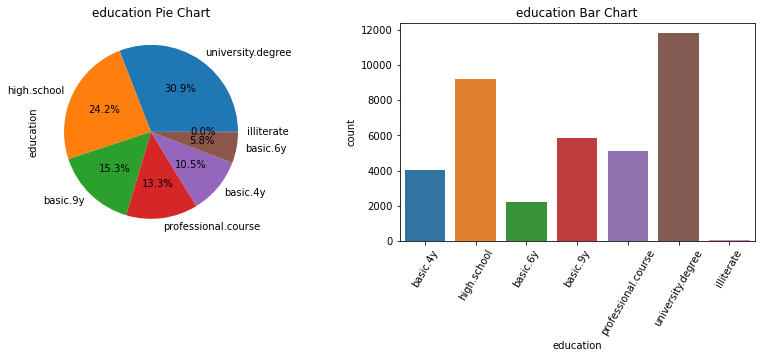

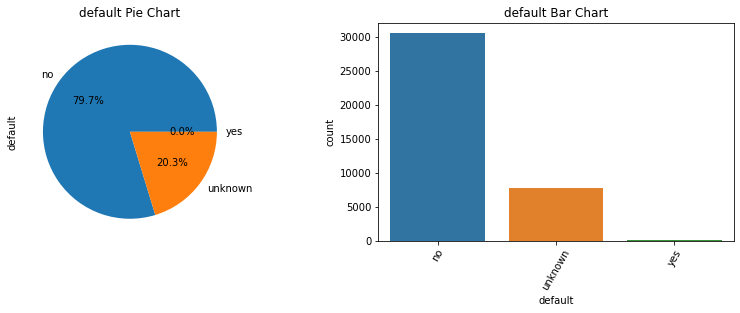

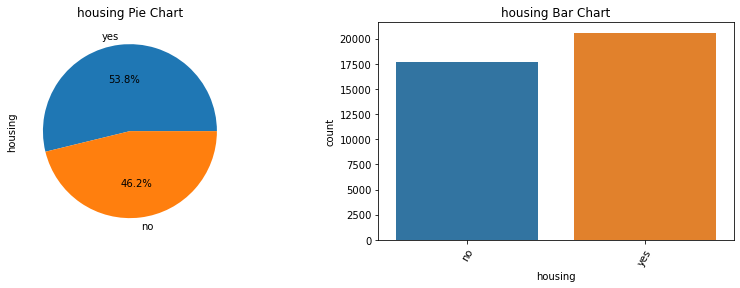

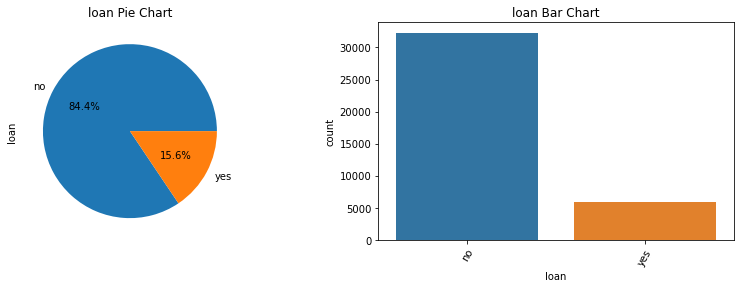

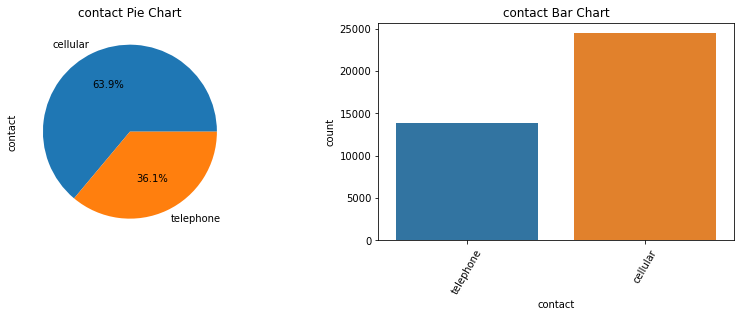

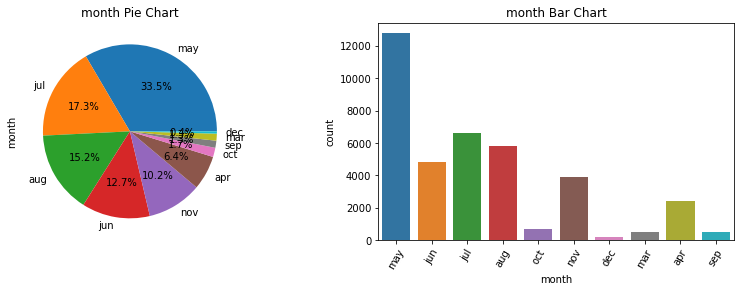

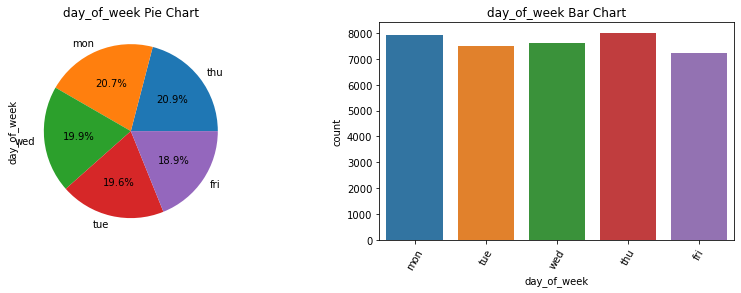

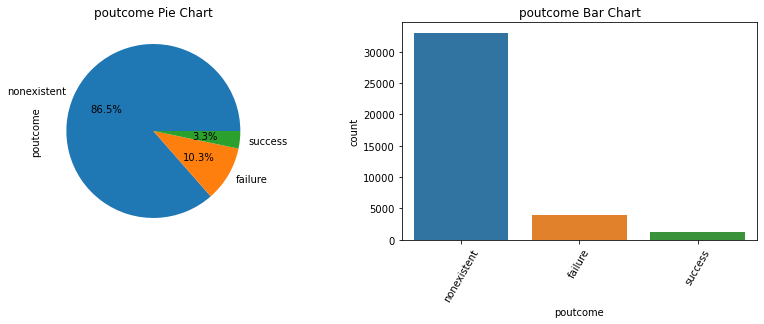

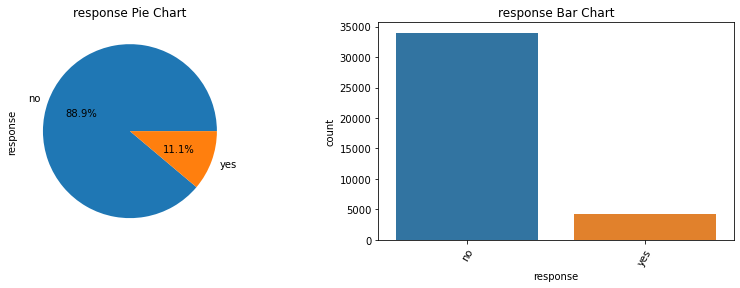

In [12]:
def plot_pie_bar_counts(i, data=df):
    plt.figure(figsize=(14,4))
    plt.subplot(1,2,1)
    data[i].value_counts().plot.pie(autopct="%1.1f%%")
    plt.title(f"{i} Pie Chart")
    plt.subplot(1,2,2)
    sns.countplot(x=i, data=df)
    plt.xticks(rotation=60)
    data[i].value_counts()
    plt.title(f"{i} Bar Chart")
    plt.show()
    
for i in df:
    if df[i].dtype in ['object','bool']:
        plot_pie_bar_counts(i, data=df)

### __Numerical features correlation vizualized using heat map__

Here we shall use the seaborn library heatmap function with __Pearson's correlation__ to correlate all numerical features with each other and find out which ones are strongly correlated

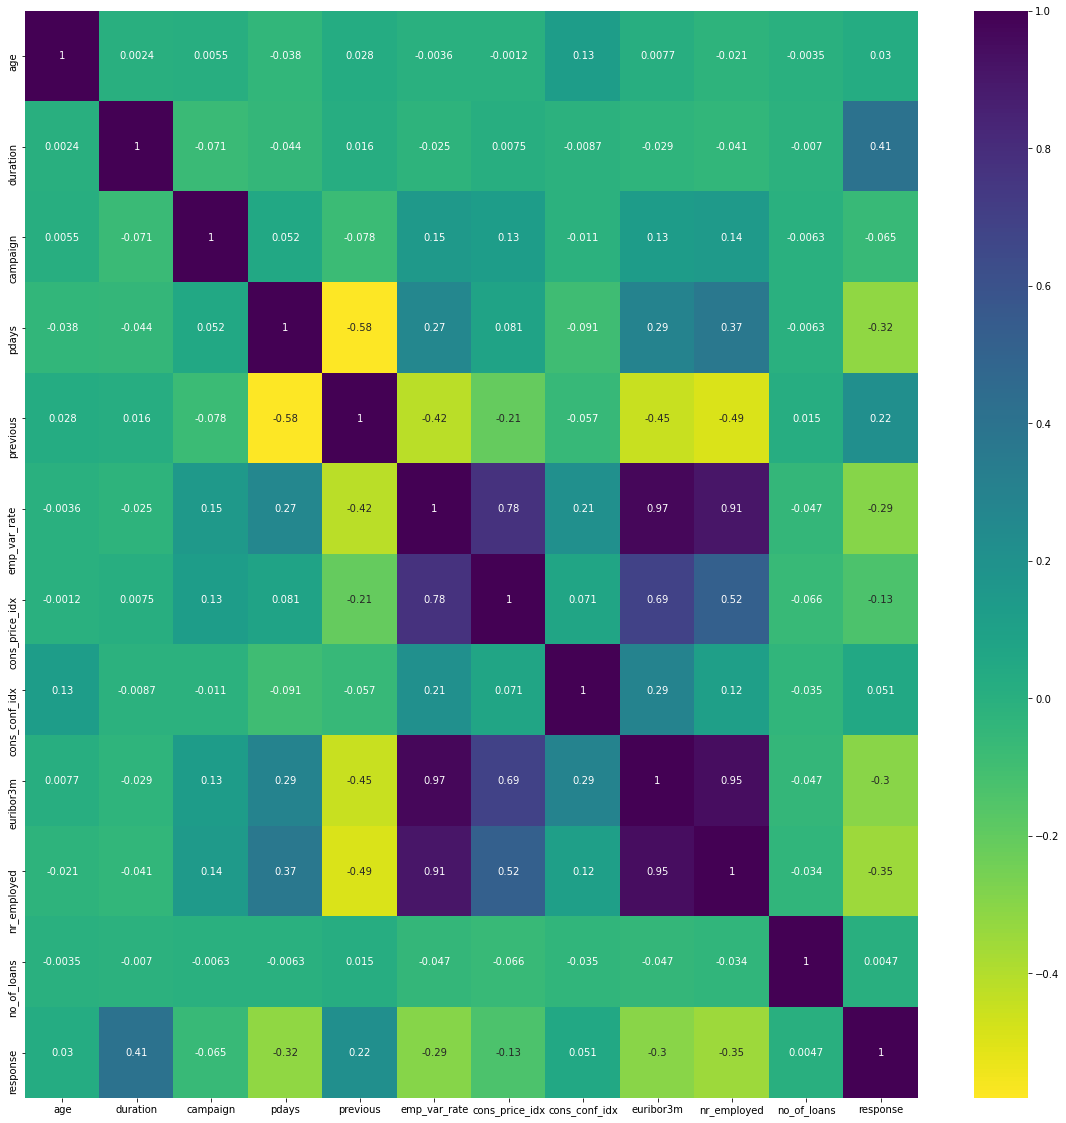

In [13]:
# Draft a heatmap to gather correlation of numerical features with each other
plt.figure(figsize=(20,20))

df1 = df.select_dtypes(['int64','float64']) 
df1['response'] = df.response.map({'yes':1, 'no':0})

sns.heatmap(
    df1.select_dtypes(['int64','float64']).corr(), 
    cmap='viridis_r', 
    annot=True
)
plt.show()

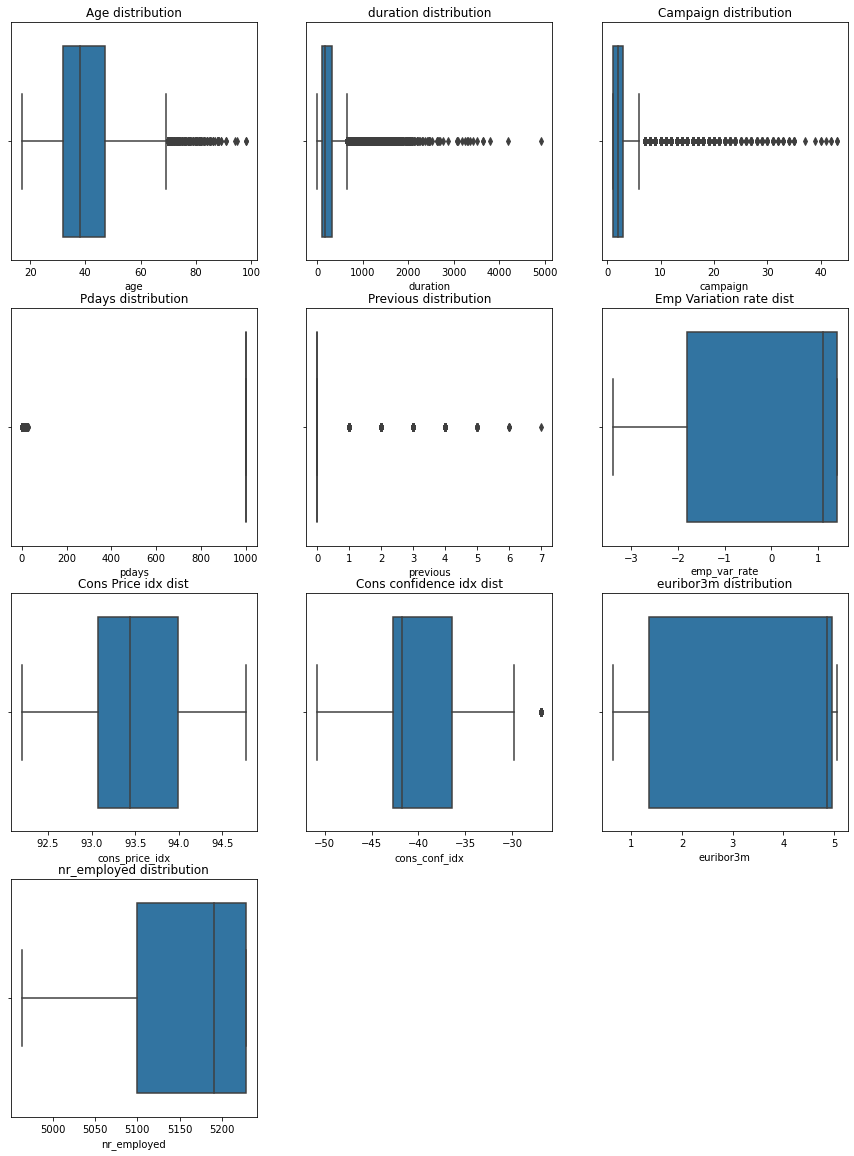

In [14]:
# generate box plots to visualize the distribution of numerical data to check for outliers
fig, ax = plt.subplots(4, 3, figsize=(15,8), sharex=False, sharey=False)

plt.subplots_adjust(top=2, bottom=0.1)

ax[3,1].axis("off")
ax[3,2].axis("off")

sns.boxplot(x="age", data=df, ax=ax[0,0])
ax[0,0].set(title="Age distribution")

sns.boxplot(x="duration", data=df, ax=ax[0,1])
ax[0,1].set(title="duration distribution")

sns.boxplot(x="campaign", data=df, ax=ax[0,2])
ax[0,2].set(title="Campaign distribution")

sns.boxplot(x="pdays", data=df, ax=ax[1,0])
ax[1,0].set(title="Pdays distribution")

sns.boxplot(x="previous", data=df, ax=ax[1,1])
ax[1,1].set(title="Previous distribution")

sns.boxplot(x="emp_var_rate", data=df, ax=ax[1,2])
ax[1,2].set(title="Emp Variation rate dist")

sns.boxplot(x="cons_price_idx", data=df, ax=ax[2,0])
ax[2,0].set(title="Cons Price idx dist")

sns.boxplot(x="cons_conf_idx", data=df, ax=ax[2,1])
ax[2,1].set(title="Cons confidence idx dist")

sns.boxplot(x="euribor3m", data=df, ax=ax[2,2])
ax[2,2].set(title="euribor3m distribution")

sns.boxplot(x="nr_employed", data=df, ax=ax[3,0])
ax[3,0].set(title="nr_employed distribution")

plt.show(fig)

### __Inferences from EDA:__

- Only 1.8% of the population are student with the highest contacts made towards admin job role at 26%
- 60% of the contacted population is married
- 30% of contacted population has university degree, 24.2% are high school graduates and a very minimal amount of population is illiterate
- 79.7% population does not have any credit default
- 53.8% population has housing loan
- 84.4% population does not have a personal loan 
- 63.9% contacts were made to cell phones 
- The month of may has the highest contact rate at 33.5% 
- Thursdays have seen the highest contact rate at 20.9% followed very closely by mon at 20.7%
- 86.5% of the population contact has poutcome non existant which implies they were not contacted during previous campaigns
- The response pie chart shows that the dataset is highly imbalanced
- Age, duration, campaign, previous and consumer confidence index has very high number of outliers that needs treatment using yeo-johnson power transform

### __Correlation / Heatmap plot inferences__
- The highest correlation is between euribor3m and emp_var_rate which is not relavent to the problem at hand
- Followed by emp_var_rate and nr_employed which is convenient because a higher number of employees in the bank would lead to a high number of employee variation rate
- duration has a good correlation with response which does mean there is a relation between duration of last call and the response received which can be further clarified during visualization
- pdays has correlation with response which suggests that someone contacted within less amount of days after being contacted once during the campaign has a higher probability towards a positive response
- nr_employed has an inverse correlation with response as well and due to its high correlation with emp_var_rate we can conclude that the lesser the emp_var_rate the higher the probability of getting a positive response

### __Part 4: Data Visualization__

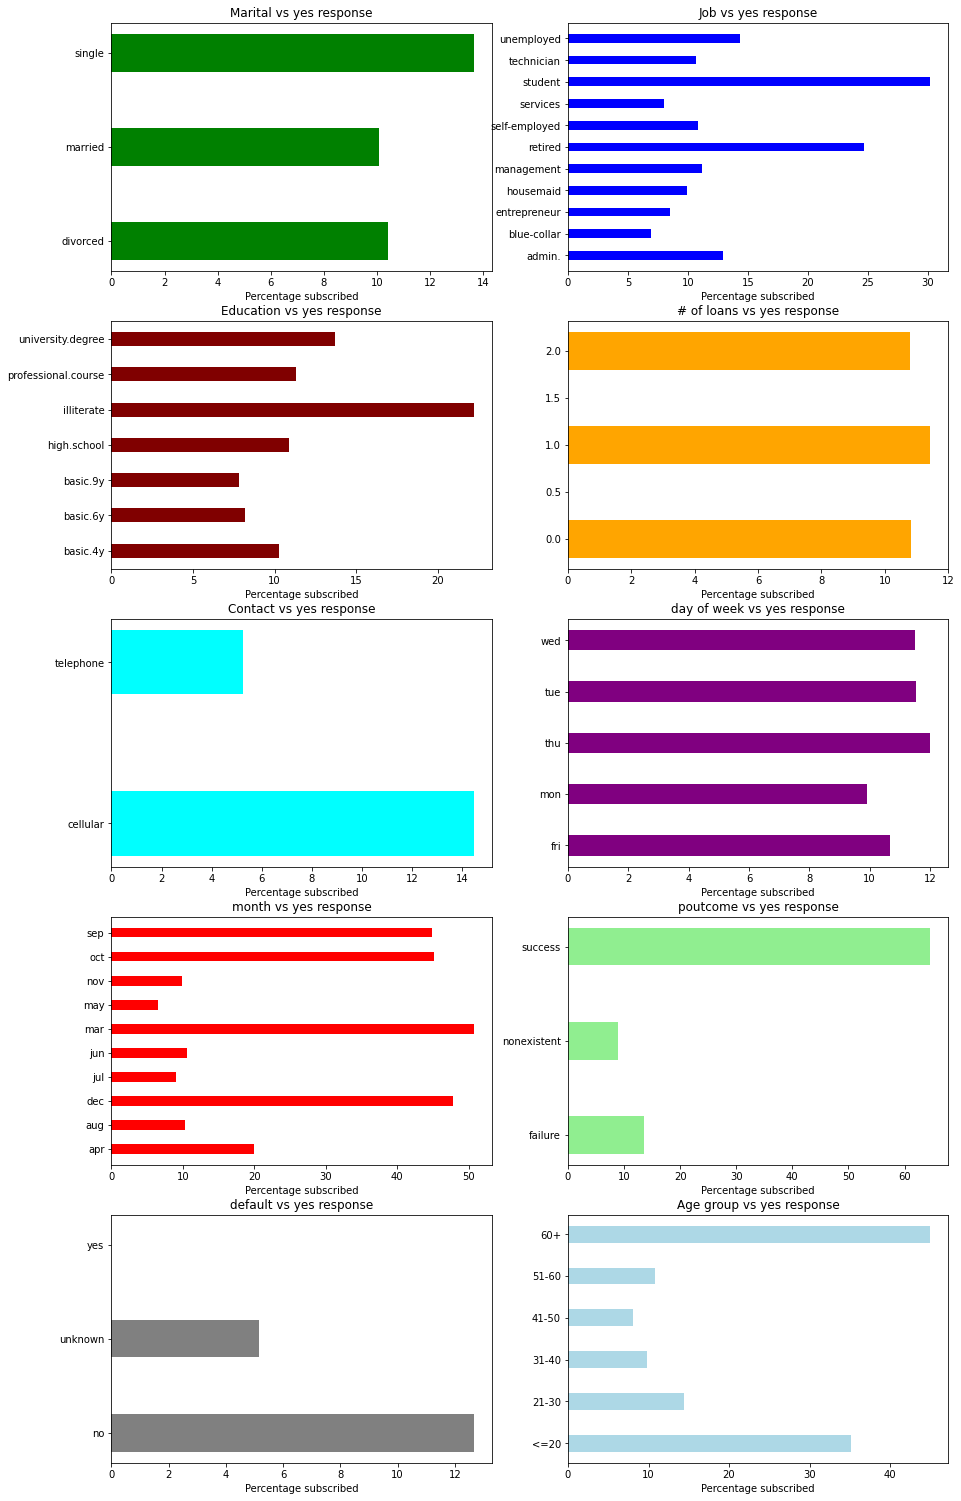

In [15]:
# Lets first gather the data of response grouped by marital status
df_marital_inst = pd.crosstab(df.response, df.marital).apply(lambda x: x/x.sum()*100).T

# Now lets gather data of response grouped by types of jobs
df_job_inst = pd.crosstab(df.response, df.job).apply(lambda x: x/x.sum()*100).T

# lets do the same for education
df_education_inst = pd.crosstab(df.response, df.education).apply(lambda x: x/x.sum()*100).T

# also lets do the same for no_of_loans, contacts, month, day_of_week and poutcome
df_loans_inst = pd.crosstab(df.response, df.no_of_loans).apply(lambda x: x/x.sum()*100).T
df_contacts_inst = pd.crosstab(df.response, df.contact).apply(lambda x: x/x.sum()*100).T
df_month_inst = pd.crosstab(df.response, df.month).apply(lambda x: x/x.sum()*100).T
df_weekday_inst = pd.crosstab(df.response, df.day_of_week).apply(lambda x: x/x.sum()*100).T
df_poutcome_inst = pd.crosstab(df.response, df.poutcome).apply(lambda x: x/x.sum()*100).T
df_default_inst = pd.crosstab(df.response, df.default).apply(lambda x: x/x.sum()*100).T
df_age_inst = pd.crosstab(df.response, df.binned_age).apply(lambda x: x/x.sum()*100).T

# now lets plot this data
fig, ax = plt.subplots(5,2, figsize=(15, 8), sharex=False, sharey=False)
plt.subplots_adjust(top=2.7, bottom=0.2)

ax[0,0].barh(df_marital_inst.index, df_marital_inst.yes, height=0.4, color="green")
ax[0,0].set_xlabel("Percentage subscribed")
ax[0,0].set_title("Marital vs yes response")

ax[0,1].barh(df_job_inst.index, df_job_inst.yes, height=0.4, color="blue")
ax[0,1].set_xlabel("Percentage subscribed")
ax[0,1].set_title("Job vs yes response")

ax[1,0].barh(df_education_inst.index, df_education_inst.yes, height=0.4, color="maroon")
ax[1,0].set_xlabel("Percentage subscribed")
ax[1,0].set_title("Education vs yes response")

ax[1,1].barh(df_loans_inst.index, df_loans_inst.yes, height=0.4, color="orange")
ax[1,1].set_xlabel("Percentage subscribed")
ax[1,1].set_title("# of loans vs yes response")

ax[2,0].barh(df_contacts_inst.index, df_contacts_inst.yes, height=0.4, color="cyan")
ax[2,0].set_xlabel("Percentage subscribed")
ax[2,0].set_title("Contact vs yes response")

ax[2,1].barh(df_weekday_inst.index, df_weekday_inst.yes, height=0.4, color="purple")
ax[2,1].set_xlabel("Percentage subscribed")
ax[2,1].set_title("day of week vs yes response")

ax[3,0].barh(df_month_inst.index, df_month_inst.yes, height=0.4, color="red")
ax[3,0].set_xlabel("Percentage subscribed")
ax[3,0].set_title("month vs yes response")

ax[3,1].barh(df_poutcome_inst.index, df_poutcome_inst.yes, height=0.4, color="lightgreen")
ax[3,1].set_xlabel("Percentage subscribed")
ax[3,1].set_title("poutcome vs yes response")

ax[4,0].barh(df_default_inst.index, df_default_inst.yes, height=0.4, color="grey")
ax[4,0].set_xlabel("Percentage subscribed")
ax[4,0].set_title("default vs yes response")

ax[4,1].barh(df_age_inst.index, df_age_inst.yes, height=0.4, color="lightblue")
ax[4,1].set_xlabel("Percentage subscribed")
ax[4,1].set_title("Age group vs yes response")

plt.show(fig)

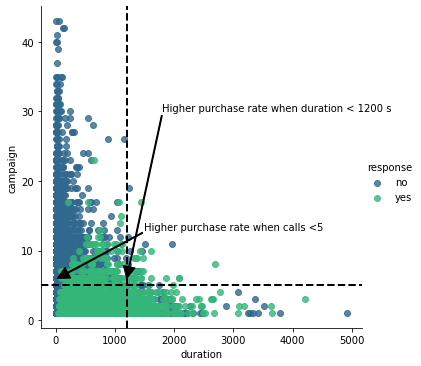

In [16]:
sns.lmplot(x='duration', y='campaign', hue='response', data=df, fit_reg=False, palette="viridis")
plt.axhline(y=5, linewidth=2, color="k", linestyle='--')
plt.annotate('Higher purchase rate when calls <5',xytext = (1500,13),
             arrowprops=dict(color = 'k', width=1),xy=(30,6))
plt.axvline(x=1200, linewidth=2, color="k", linestyle='--')
plt.annotate('Higher purchase rate when duration < 1200 s',xytext = (1800,30),
             arrowprops=dict(color = 'k', width=1),xy=(1200,6))
plt.show()

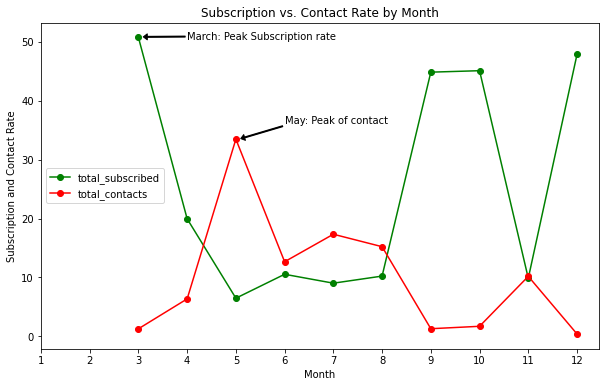

In [17]:
df2 = df
df2['month_int'] = df2.month.map({
    "may": 5,
    "jul": 7,
    "aug": 8,
    "jun": 6,
    "nov": 11,
    "apr": 4,
    "oct": 10,
    "sep": 9,
    "mar": 3,
    "dec": 12
})

month_yes_pct = pd.crosstab(df2['response'],df2['month_int']).apply(lambda x: x/x.sum() * 100)
month_yes_pct = month_yes_pct.transpose()

month = pd.DataFrame(df2['month_int'].value_counts())
month['total_contacts'] = month['month_int']*100/month['month_int'].sum()
month['total_subscribed'] = month_yes_pct['yes']
month.drop('month_int',axis = 1,inplace = True)
month['month'] = month.index
month.sort_values('month', ascending=True, inplace=True)

month[['total_subscribed','total_contacts']].plot(
    kind ='line',
    figsize = (10,6), 
    marker = 'o',
    color=["green", "red"]
)
plt.title('Subscription vs. Contact Rate by Month')
plt.ylabel('Subscription and Contact Rate')
plt.xlabel('Month')

ticks = np.arange(1,13,1)
plt.xticks(ticks)

# Annotation: peak of contact
y = month['total_contacts'].max()
x = month['total_contacts'].idxmax()
plt.annotate('May: Peak of contact', xy=(x+0.1, y+0.1), xytext=(x+1,y+4), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')

# Annotation: peak of subscription rate
y = month['total_subscribed'].max()
x = month['total_subscribed'].idxmax()
plt.annotate('March: Peak Subscription rate', xy=(x+0.1, y+0.1), xytext=(x+1,y+1), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')

plt.show()

In [18]:
from bokeh.plotting import figure, ColumnDataSource
from bokeh.layouts import row, column
from bokeh.models import HoverTool
from bokeh.layouts import gridplot

#lets define a function that can futher be used to plot scatter plots for our bivariate combination of data
def plot_scatter(data, x, y, graph='circle'):
    source = ColumnDataSource(data)

    # Age vs EmpJobLevel
    h_age = [
        (x, "@"+x),
        (y, "@"+y)
    ]
    p1 = figure(
        plot_width=300, 
        plot_height=300, 
        title=f"{x} vs {y}", 
        tooltips=h_age, 
        tools='box_select,lasso_select,help,zoom_in,zoom_out'
    )
    p1.xaxis.axis_label = x
    p1.yaxis.axis_label = y
    getattr(p1, graph)(x, y, source=source)
    return p1

In [19]:
from bokeh.io import output_file, save
graph_combinations = [
    ("duration", "response"),
    ("pdays", "response"),
    ("previous", "nr_employed"),
    ("previous", "euribor3m"),
    ("previous", "emp_var_rate"),
    ("previous", "pdays"),
    ("emp_var_rate", "response"),
    ("emp_var_rate", "nr_employed"),
    ("emp_var_rate", "euribor3m"),
    ("emp_var_rate", "cons_price_idx"),
    ("cons_price_idx", "euribor3m"),
    ("cons_price_idx", "nr_employed"),
    ("euribor3m", "response"),
    ("nr_employed", "response"),
    ("euribor3m", "nr_employed")
]

graphs = []
counter = 0
for i in graph_combinations:
    counter += 1
    globals()[f"var{counter}"] = plot_scatter(df1, i[0], i[1], graph='circle')
    graphs.append(globals()[f"var{counter}"])
    

p = gridplot(
    [
        [var1, var2, var3],
        [var4, var5, var6],
        [var7, var8, var9],
        [var10, var11, var12],
        [var13, var14, var15],
    ])

output_file('bivariate_analysis_portuguese_bank_marketing.html')
save(p)

'C:\\Users\\sysadmin\\cds_capstone\\prcp_1000_bankm\\bivariate_analysis_portuguese_bank_marketing.html'

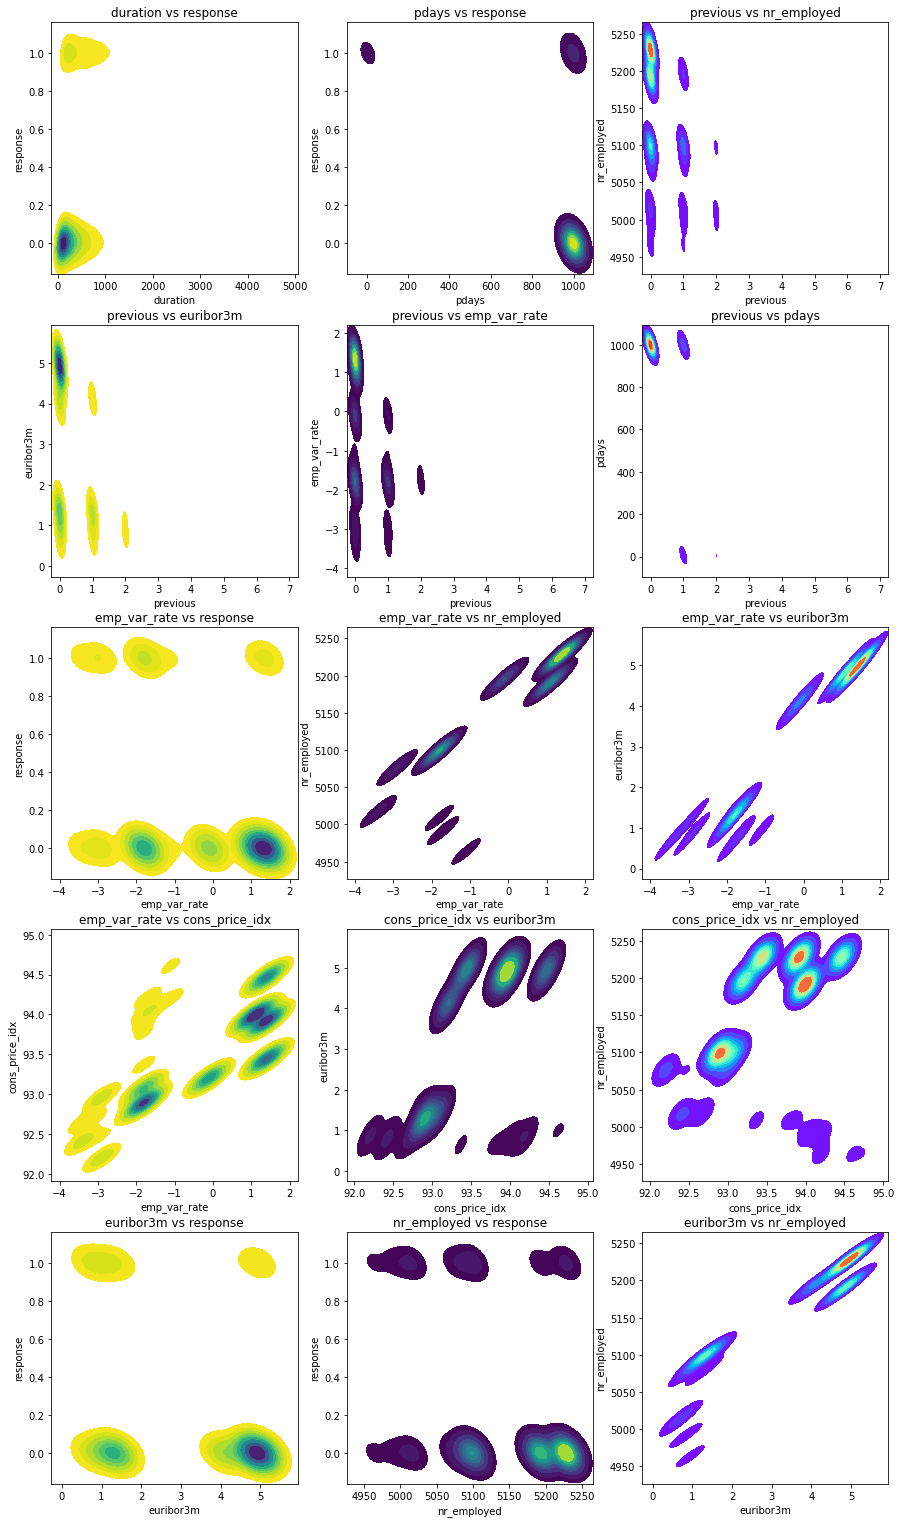

In [96]:
# lets generate some heatplots between two features and gather some inferences on the data using its distribution using kdeplots
fig, ax = plt.subplots(
    5,
    3,
    figsize=(15,7)
)

plt.subplots_adjust(
    bottom=0.1, 
    top=3
)

cmap = ['viridis_r', 'viridis', 'rainbow']

k = 0
for i in range(0,5):
    for j in range(0,3):
        sns.kdeplot(graph_combinations[k][0], graph_combinations[k][1], ax=ax[i,j], data=df1, shade=True, cmap=cmap[j])
        ax[i,j].set(title=f"{graph_combinations[k][0]} vs {graph_combinations[k][1]}")
        k += 1

plt.show()

### __Inferences from Visualization:__

#### __Among the people who subscribed__
- Single ones subscibe more than married or divorced
- Students have the highest subscription rate
- people with one loan subscribe more than those with no loans or more than one loans
- Subscription rate is higher for those contacted on their cellphones
- Thursdays have seen higher subscription rate as it should be as thursdays have highest contact rates during the course of any week
- The month of march has seen the highest subscription rate
- Those who had subscribed to term deposit in earlier campaigns tend to subscribe during this campaigns
- As it is evident those with no credit default has a considerably high subscription rates 
- Those above the age of 60 i.e. elderly people has a high tendency to subscribe to term deposit

### __Inference from lmplot__
- those contacts which lasted less than 1200 seconds and had been contacted less than 6 times during this campaign has resulted into subscription to term deposit at a considerably high rate

### __Inferences form Kernal density estimate plots and scatter plots__
- Kernal density estimate plots draft the cumulative density of data points with respect to each of the two features provided and we can further infer the correlation of theirs as seen in the heatmaps

### __Part 5: Model Selection__

In [20]:
# lets separate out the categorical and numerical features
df.drop(['binned_age','duration_binned','month_int'], axis=1, inplace=True)
main_df = pd.concat([df.iloc[:,:-2], df.no_of_loans], axis=1)
cat_set = main_df.select_dtypes(['object', 'bool'])
num_set = main_df.select_dtypes(['int64','float64'])

num_set.pdays[num_set.pdays == 999] = 0

cat_set = pd.get_dummies(cat_set)
main_df = pd.concat([cat_set, num_set], axis=1)
y = df.response

# lets perform the train tests split
X_train, X_test, y_train, y_test = train_test_split(main_df, y, test_size=0.25, random_state=19)
print('train test split done')


# lets balance the dataset
oversample = SMOTE()
undersample = RandomUnderSampler()
steps = [("o", oversample),("u",undersample)]
pipeline = Pipeline(steps=steps)
X_bal, y_bal = pipeline.fit_resample(X_train, y_train)
print('dataset balancing done')


# lets also scale our dataset
# here we have used the robust scaler because it is not sensitive to the outliers
scaler = RobustScaler()
scaler.fit(
    X_bal.loc[:,~X_bal.columns.isin(['age', 'duration', 'campaign', 'pdays','previous'])]
)
X_bal.loc[:,~X_bal.columns.isin(['age', 'duration', 'campaign', 'pdays','previous'])] = scaler.transform(
    X_bal.loc[:,~X_bal.columns.isin(['age', 'duration', 'campaign', 'pdays','previous'])]
)

# transforming the test set using training data mean and standard deviations
X_test.loc[:,~X_test.columns.isin(['age', 'duration', 'campaign', 'pdays','previous'])] = scaler.transform(
    X_test.loc[:,~X_test.columns.isin(['age', 'duration', 'campaign', 'pdays','previous'])]
)
print("Scaling complete")


# now lets perform power transform and data set balancing
# power transform is actually a type of scaling which can elimiate the sensitivity to outlier
# here yeo_johnson method is used since the box-cox method cannot handle 
# any value that is 0 or less than 0 and we do have such values
pt = PowerTransformer(method='yeo-johnson')
pt.fit(
    X_bal.loc[:, X_bal.columns.isin(['age', 'duration', 'campaign', 'pdays','previous'])]
)
X_bal.loc[:, X_bal.columns.isin(['age', 'duration', 'campaign', 'pdays','previous'])] = pt.transform(
    X_bal.loc[:, X_bal.columns.isin(['age', 'duration', 'campaign', 'pdays','previous'])]
)

# applying the training lambdas to test set
X_test.loc[:, X_test.columns.isin(['age', 'duration', 'campaign', 'pdays','previous'])] = pt.transform(
    X_test.loc[:, X_test.columns.isin(['age', 'duration', 'campaign', 'pdays','previous'])]
)
print("Power transform complete")

train test split done
dataset balancing done
Scaling complete
Power transform complete


In [ ]:
print("Started training models ..............")
models = {
    'logr': LogisticRegression(),
    'knn': KNeighborsClassifier(n_neighbors=3),
    'MLP': MLPClassifier(hidden_layer_sizes=(64, 32, 3), activation='relu'),
    'RandomF': RandomForestClassifier(n_estimators=200),
    'g_boost': GradientBoostingClassifier(),
    'xgboost': XGBClassifier(objective='multi:softmax', eval_metric='merror', early_stopping_rounds=10)
}

model_report = {}
for key, value in models.items():
    
    #lets first create k folds of our dataset
    kfold = KFold(n_splits=10, random_state=15, shuffle=True)
    
    #now lets train and varify each model's cross validations score
    print(f"started training {key}............")
    cv_report = cross_val_score(value, X_bal, y=y_bal, cv=kfold, scoring='accuracy')
    print(f"finished training {key}")
    model_report.update(**{
        key: (cv_report, cv_report.mean(), cv_report.std())
    })

print("plotting algo accuracy")
fig = plt.figure(figsize=(15,8))

fig.suptitle('Algo Performance')
ax = fig.add_subplot(1,1,1)
plt.boxplot([value[0] for value in model_report.values()])
ax.set_xticklabels([key for key in model_report.keys()])
plt.show()

Started training models ..............
started training logr............
finished training logr
started training knn............
finished training knn
started training MLP............


### __Selected Model/s__

1. __RandomForestClassifier__
2. __XGBoost__

- _The above two models seem to be performing a little better than the other ones as seen from the plot above_

### __Part 6: Model Evaluation__

#### __RandomForestClassifier Evaluation__

In [ ]:
params = {
    'n_jobs': -1,
    'n_estimators': 700,
    'warm_start': True, 
    'max_features': 0.4,
    'max_depth': 12,
    'min_samples_leaf': 2,
    'max_features' : 'auto',
    'random_state' : 19,
    'verbose': 0
}

model = RandomForestClassifier(**params)

model.fit(X_bal, y_bal)

y_predict_test = model.predict(X_test)
y_predict_train = model.predict(X_bal)

print(f"training accuracy: {accuracy_score(y_predict_train, y_bal)}")
print(f"testing accuracy: {accuracy_score(y_predict_test, y_test)}")
print(f"{classification_report(y_predict_test, y_test)}")

yes    25479
no     25479
Name: response, dtype: int64

#### __XGBClassifier Evaluation__

In [82]:
params = {
    'tree_method': 'hist', 
    'n_estimators': 700, 
    'max_depth': 7, 
    'learning_rate': 0.3, 
    'booster': 'dart',
    'objective': 'multi:softmax',
    'eval_metric': 'merror',
    'num_class': 3,
    'early_stopping_rounds': 10
}

model = XGBClassifier(**params)

model.fit(X_bal, y_bal)

y_predict_test = model.predict(X_test)
y_predict_train = model.predict(X_bal)

print(f"training accuracy: {accuracy_score(y_predict_train, y_bal)}")
print(f"test accuracy: {accuracy_score(y_predict_test, y_test)}")
print(f"{classification_report(y_predict_test, y_test)}")

KeyboardInterrupt: 

### __Part 7: Hyperparameter Tuning__

In [ ]:
xgb_params ={
    'n_estimators': [400 ,500, 600, 700, 800, 900],
    'booster': ['gbtree','dart'],
    'learning_rate': [0.01, 0.1, 0.15, 0.2, 0.3],
    'max_depth': [7, 8, 9, 10, 11, 12, 14],
    'tree_method': ['auto','exact','approx','hist'],
}

init_params = {
    'objective' : 'multi:softprob',
    'n_jobs': -1,
    'eval_metric': 'merror',
    'use_label_encoder': True, 
}

model = XGBClassifier(**init_params)

random_search = RandomizedSearchCV(
    model, 
    xgb_params, 
    cv=4, 
    n_jobs=1, 
    verbose=0, 
    return_train_score=True
)

random_search.fit(X_bal, y_bal)

print(random_search.best_params_)
print(random_search.best_score_)

### __Part 8: Conclusion and Further Research Recommandation__